In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [62]:
df = sns.load_dataset('titanic')

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.shape

(891, 15)

In [66]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Data Preprocessing

In [68]:
# Removing unnecessary column
df.drop(['who', 'alive'], axis=1, inplace=True)

In [69]:
df['adult_male'].unique()

array([ True, False])

In [70]:
df.drop(['adult_male'], axis=1, inplace=True)

In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,True


In [72]:
# Replacing Categorical Values to Quantitative
df['sex'].replace(to_replace='male', value=1, inplace=True)
df['sex'].replace(to_replace='female', value=0, inplace=True)

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,NaN,Southampton,True


In [74]:
# Replacing Missing ages with mean value
mean_age = df['age'].mean()

df['age'].fillna(mean_age, inplace=True)

# Data Visualization

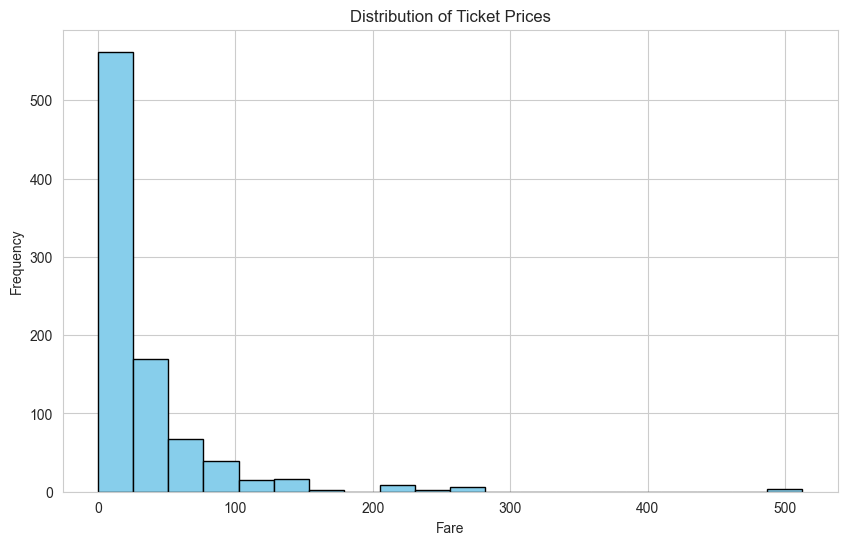

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

plt.hist(df['fare'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

<Axes: xlabel='age', ylabel='Count'>

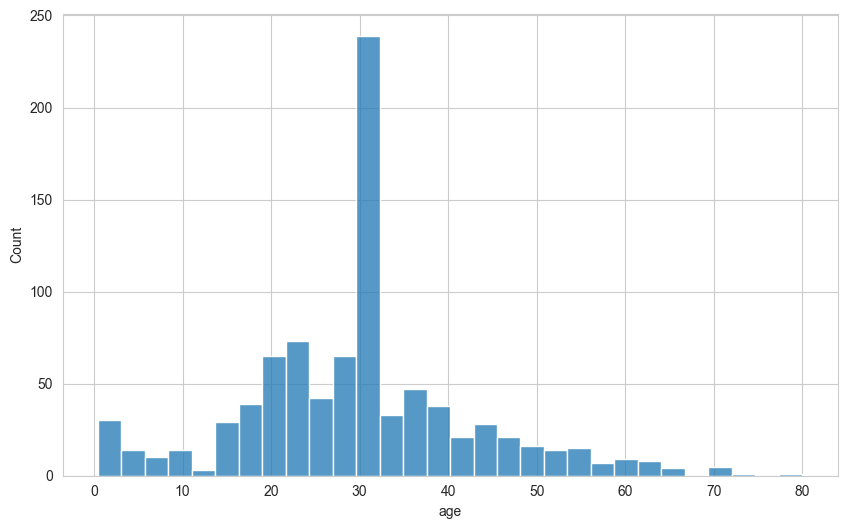

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age')

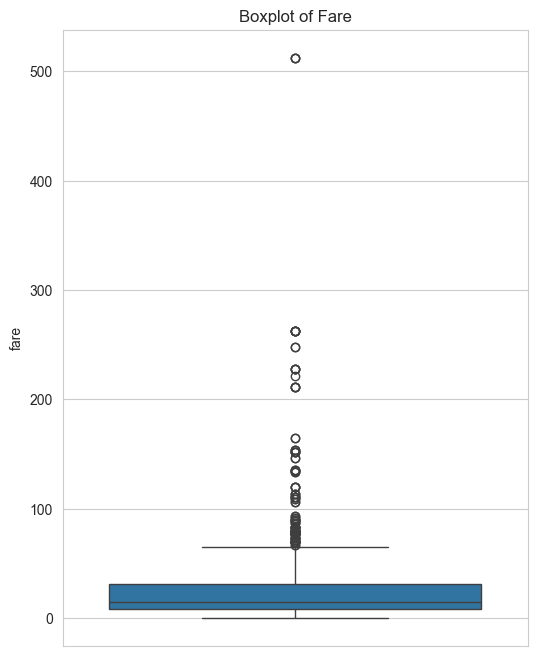

116


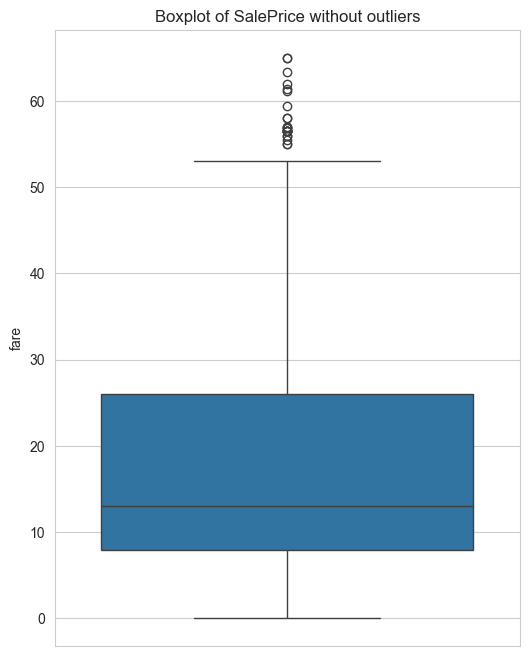

In [77]:
# Removing the outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['fare'])
plt.ylabel('fare')
plt.title('Boxplot of Fare')
plt.show()

# Calculate IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_limit) | (df['fare'] > upper_limit)]

# Count the number of outliers
num_outliers = len(outliers)
print(num_outliers)


# Remove outliers
data = df[(df['fare'] >= lower_limit) & (df['fare'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['fare'])
plt.ylabel('fare')
plt.title('Boxplot of SalePrice without outliers')
plt.show()

In [78]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,NaN,Southampton,True


<Axes: xlabel='pclass', ylabel='count'>

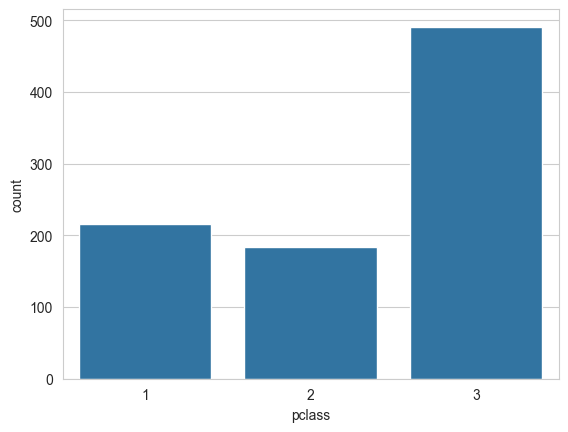

In [79]:
sns.countplot(x='pclass', data=df)

In [80]:
df['sex'].replace(to_replace=1, value='male', inplace=True)
df['sex'].replace(to_replace=0, value='female', inplace=True)

<Axes: xlabel='sex', ylabel='Count'>

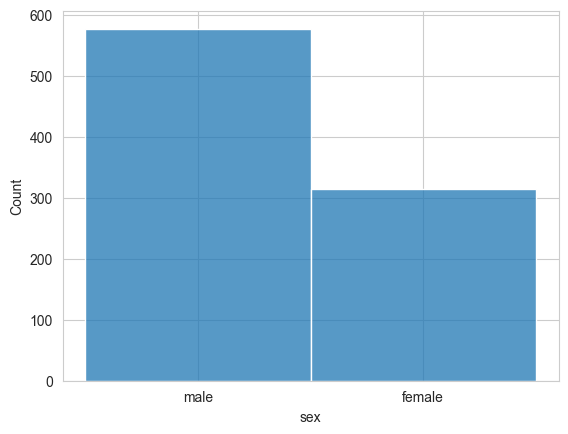

In [81]:
sns.histplot(data=df, x="sex")

<Axes: xlabel='sex', ylabel='survived'>

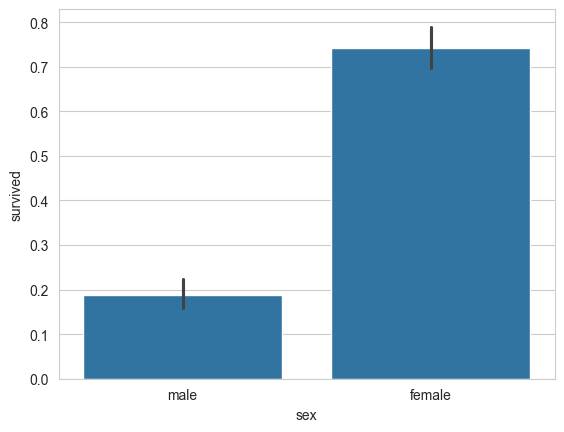

In [82]:
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

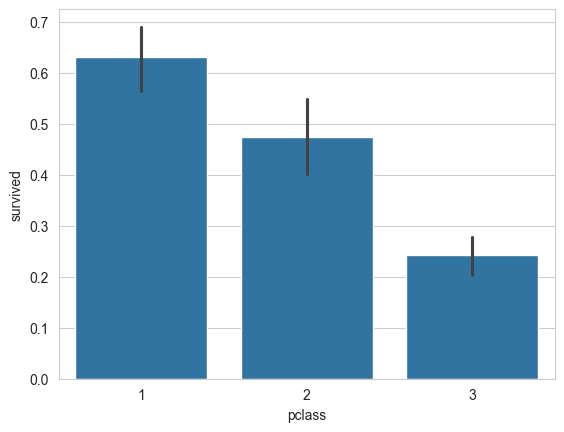

In [83]:
sns.barplot(x='pclass', y='survived',data=df)

<Axes: xlabel='pclass', ylabel='fare'>

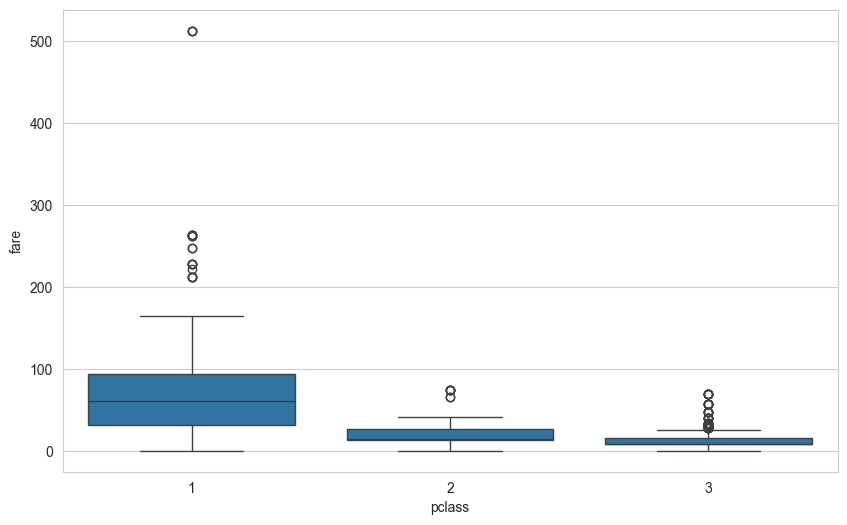

In [84]:
# Boxplot of pclass vs fare

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)

<Axes: xlabel='pclass', ylabel='age'>

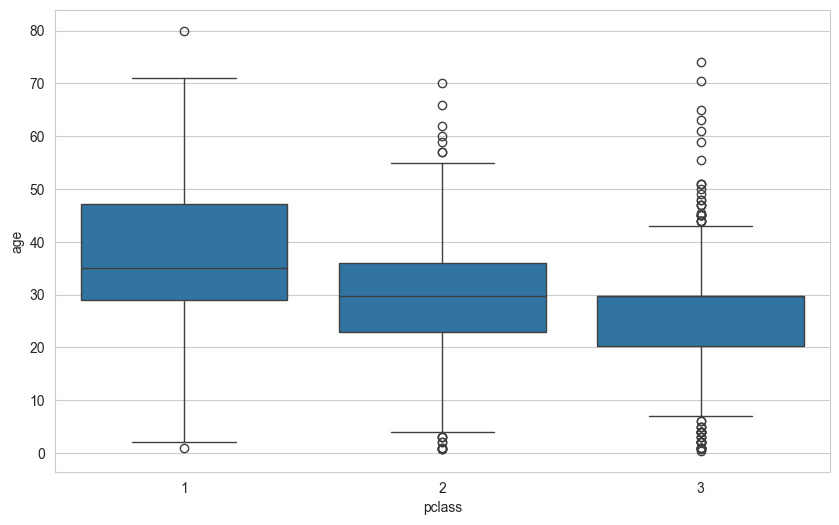

In [85]:
# Boxplot of pclass vs age

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=df)

<Axes: xlabel='pclass', ylabel='age'>

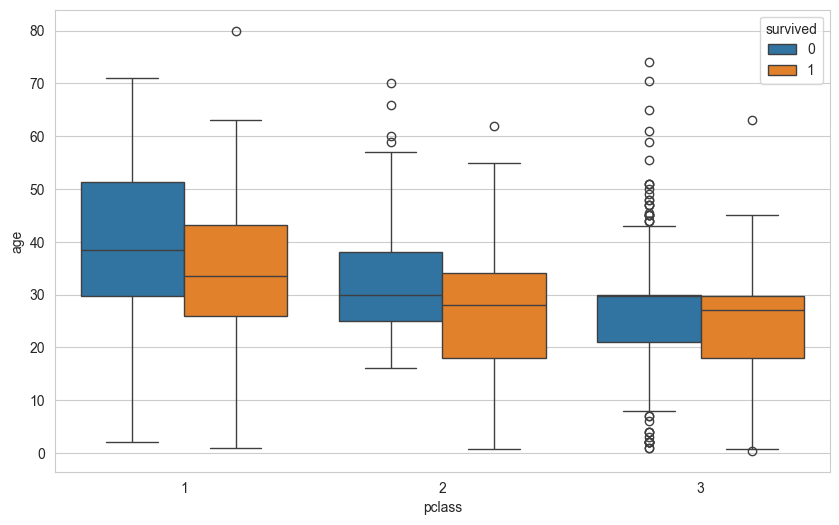

In [86]:
# Boxplot of pclass vs ags and hue = survived

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', hue='survived', data=df)

<Axes: xlabel='sex', ylabel='age'>

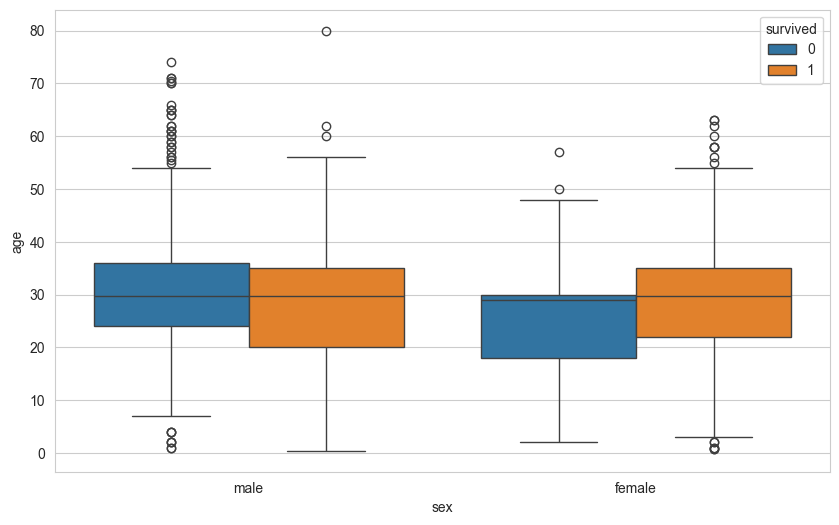

In [87]:
# Boxplot of sex vs age and hue = survived

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=df)

<Axes: xlabel='pclass', ylabel='age'>

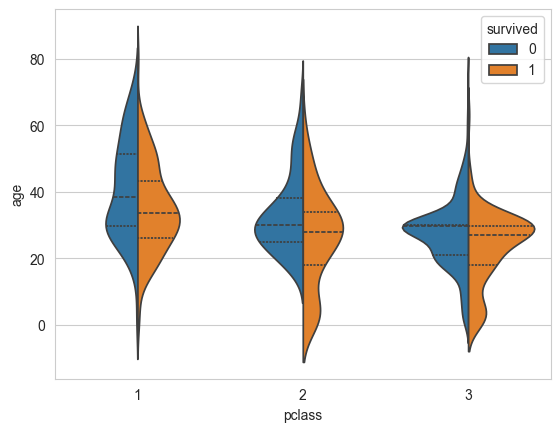

In [88]:
sns.violinplot(x=df['pclass'], y=df['age'], hue=df['survived'], split=True, inner='quartile')

* 3D Visualization

In [89]:
from mpl_toolkits.mplot3d import Axes3D

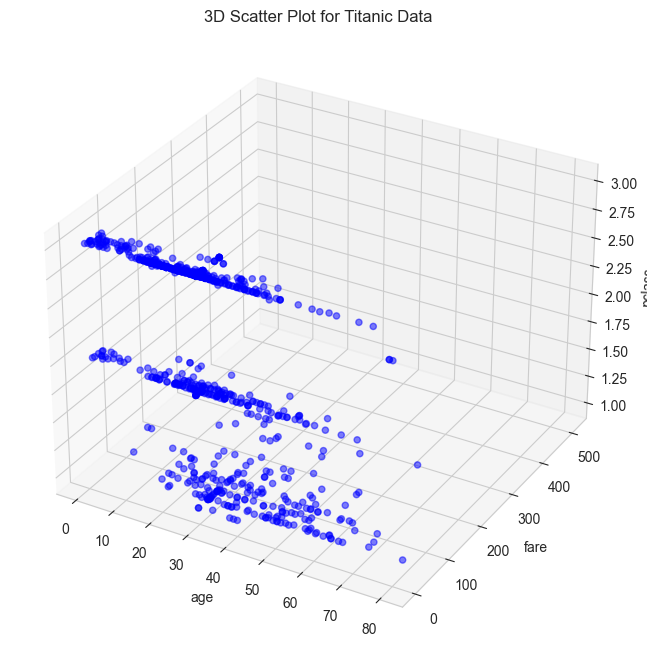

In [90]:
x_column = 'age'
y_column = 'fare'
z_column = 'pclass'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x_column], df[y_column], df[z_column], c='blue', marker='o', alpha=0.5)

ax.set_xlabel(x_column)
ax.set_ylabel(y_column)
ax.set_zlabel(z_column)

ax.set_title('3D Scatter Plot for Titanic Data')

plt.show()